In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
from sklearn.cluster import DBSCAN
from collections import Counter

%matplotlib inline
rcParams['figure.figsize'] = 7.5, 6
sns.set_style('whitegrid')

df = sns.load_dataset("iris")
cols = ['comp da cepa', 'larg da cepa', 'comp da pétala', 'larg da pétala', 'espécie']
df.columns = cols
X = df[cols[:4]].values
y = df['espécie'].values

In [8]:
modelo = DBSCAN(eps=0.8, min_samples=19).fit(X)
print(modelo)

DBSCAN(eps=0.8, min_samples=19)


In [9]:
outliers_df = pd.DataFrame(X)

print(Counter(modelo.labels_))

Counter({1: 94, 0: 50, -1: 6})


In [10]:
filtro = modelo.labels_ == -1
print(outliers_df[filtro])

       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


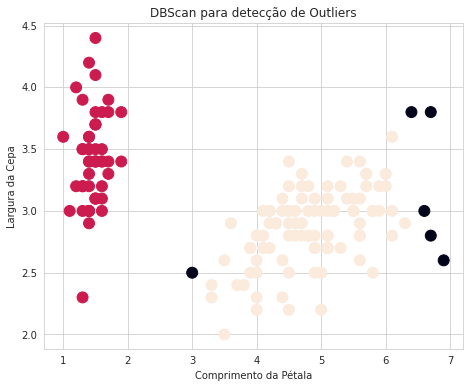

In [11]:
cores = modelo.labels_

plt.scatter(X[:,2], X[:,1], c=cores, s=120)
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Cepa')
plt.title('DBScan para detecção de Outliers')
plt.show()